## 4.2 Back to the 21st century! Using FAST and ORB

The Harris corner detector has been employed in a vast amount of works since its proposal back in 1988 and it's still being used in many approaches because of its simplicity and performance. However, the computer vision community has obviously moved on in recent years and nowadays is being focused in using faster methods to detect corners. One of the most successful and popular methods for detecting corners is called **FAST** (**F**eatures from **A**ccelerated **S**egment **T**est), which, has its name suggest is clearly faster than most of the methods developed so far. [Published in 2006](https://link.springer.com/chapter/10.1007/11744023_34), the work by Rosten and Drummond claims to operate around 20x faster than the Harris method and finds a considerably large amount of keypoints (sometimes too much!).

In a nutshell, in its original form, it operates by comparing the grey level of a certain pixel in the image with a surrounding circle of 16 pixels. If at least 12 consecutive pixels in that circle are brighter (or darker) than the candidate, then it is a considered as a corner. Being based just in pixel comparisons, you can imagine its speed!

<img src="./images/fast.png" width="400">

In fact, by wisely selecting the first 4 pixels to compare, fast rejection of possible candidates can be easily applied. Some variations of the original proposal have been developed later, turning the FAST-based approaches a prominent method for detecting corners nowadays.

However, this method **does not provide a descriptor** for the detected corners, so, as we learnt before, they must be augmented with a descriptor in order to be matched! We could use again NCC and a patch, but in this case we are going to explore the ORB method, which is [a detection and description method](https://ieeexplore.ieee.org/abstract/document/6126544) developed in 2011 by Rublee *et.al*.

ORB stands for **O**riented FAST and **R**otated **B**RIEF and combines the FAST detector with a modified version of the [BRIEF descriptor](https://link.springer.com/chapter/10.1007/978-3-642-15561-1_56). In short, ORB operates as follows:

1. It detects FAST corners and computes its main orientation. 
- It rotates the sourrounding patch of the keypoint according to the main orientation.
- It computes the BRIEF descriptor by comparing the grey level in a set of wisely selected pairs of pixels within the (rotated) patch, yielding a **binary** sequence that corresponds to the descriptor. 

Since the resulting descriptors are binary (i.e. sequences of bits), they can be easily compared by using the so-called [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance), which, essentially, computes the number of different bits in the two descriptors.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
images_path = './images/'

### **<span style="color:green"><b><i>ASSIGNMENT 1: Using ORB</i></b></span>**

Now let's try a simple example of using ORB. Write a script that:
1. Loads the images 'park_l.jpeg' and 'park_r.jpeg' in grayscale.
- Detect ORB keypoints.
- Compute their ORB descriptor.
- Use a Brute-Force matcher to find correspondences between both sets of keypoints. A Brute-Force matcher simply compares a certain descriptor in a list with all the rest of descriptors in an exhaustive search.
- Order the matches according to their distance (have a look to [`sorted()`](https://wiki.python.org/moin/HowTo/Sorting) and use as key the lambda function `x:x.distance`). Set the `crossCheck` argument to `True` in order to get more robust matches.
- Once all matches are defined, call `cv2.drawMatches` and display the resulting image with the 30 best matches. Try `cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS` as flag in this function call.

*Tip: Search for some documentation regarding ORB detection/description and brute-force matching in OpenCV.*

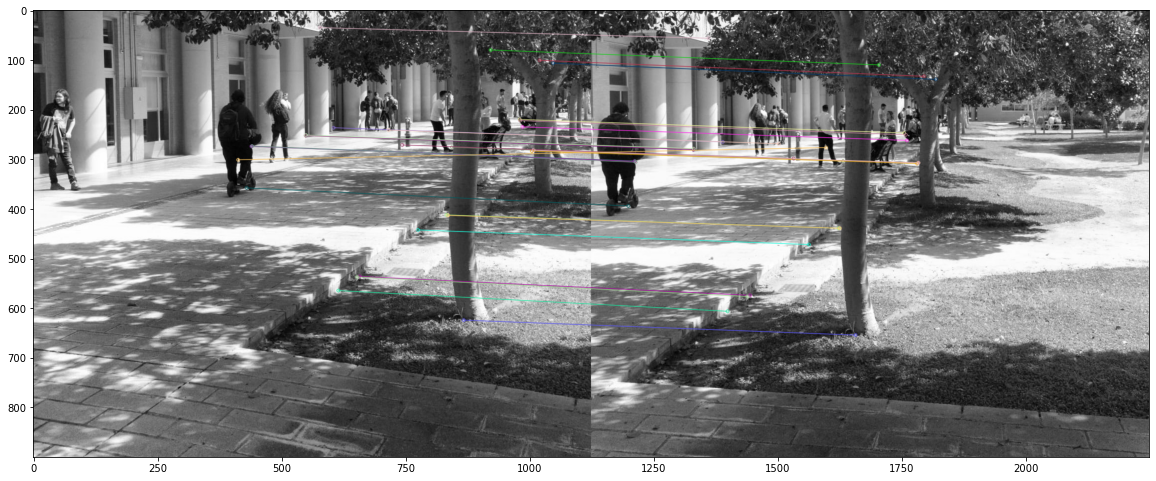

In [2]:
# Assignment 1
# Detect and describe keypoints using ORB in two images ('park_l.jpeg' and 'park_r.jpeg'), then match them using a brute-force matcher.
# Write your code here

# Load the two previous images and convert to grayscale
image_l = cv2.imread(images_path + 'park_l.jpeg',cv2.IMREAD_GRAYSCALE)
image_r = cv2.imread(images_path + 'park_r.jpeg',cv2.IMREAD_GRAYSCALE)

# Detect the ORB keypoints using the OpenCV method
# -- create the ORB detector
orb = cv2.ORB_create()

# -- detect ORB keypoints 
kp_l = orb.detect(image_l,None)
kp_r = orb.detect(image_r,None)

# -- compute the descriptors with ORB
kp_l, des_l = orb.compute(image_l, kp_l)
kp_r, des_r = orb.compute(image_r, kp_r)

# Note: detection and description can be done in just one call

# Match descriptors.
matches = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True).match(des_l,des_r)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
       
# Display both images side-by-side along with the matches
image_matches = np.copy(image_l)
image_matches = cv2.drawMatches(image_l,kp_l,image_r,kp_r,matches[:30],image_matches,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) #,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# And finally show them
plt.imshow(image_matches)

### <font color="blue"><b><i>Thinking about it</i></b></font>

Now you can compare this output with the one produced by Harris + NCC...
- **What could you conclude?**

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Your answer here!</i></p>
    

## Conclusion

This was a short but intense notebook covering state-of-the-art keypoint detection and description techniques such as FAST and ORB. It is exciting to stay informed of modern techniques!